# Adjectives

In [470]:
import requests
import json

In [471]:
from utils.json_utils import write_json, read_json
from utils.encoding_utils import w2v_embeddings_PCA

In [472]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [473]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

import numpy as np
import json

In [474]:
def generate_wordcloud_color_no_ranks(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, collocations=False, colormap='viridis', relative_scaling=1, min_font_size=50, max_font_size=50, width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [475]:
def graph_wordcloud(wordcloud):
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [476]:
def w2v_embeddings_PCA_plot(emb_df_PCA):
    plt.clf()
    fig = plt.figure(figsize=(6,4))

    plt.scatter(
        x = emb_df_PCA['x'],
        y = emb_df_PCA['y'],
        s = 0.4,
        color = 'maroon',
        alpha = 0.5
    )

    plt.xlabel('PCA-1')
    plt.ylabel('PCA-2')
    plt.title('PCA Visualization')
    plt.plot()

## From API

In [477]:
def get_adjective():
    api_url = 'https://api.api-ninjas.com/v1/randomword'
    payload = {"type": "adjective"}
    response = requests.get(api_url, headers={'X-Api-Key': 'FFCtEIsVURwsSSIVEGoXRw==rS2glRiXqmy9IV4c'},params=payload)
    if response.status_code == requests.codes.ok:
        return json.loads(response.text)["word"]
    else:
        print("Error:", response.status_code, response.text)
        return None

In [478]:
adjectives_filename = "14_api_adjectives_p2.json"
get_more_adjectives = False
ask_for             = 20000

In [479]:
adjectives = set()
try:
    file_adjectives = read_json(adjectives_filename)
    adjectives.update(file_adjectives)
    print(str(len(file_adjectives)) + " adjectives were loaded from file: " + adjectives_filename)
except IOError:
    print("File could not be loaded.")

2793 adjectives were loaded from file: 14_api_adjectives_p2.json


In [480]:
if get_more_adjectives:
    for i in range(0, ask_for):
        adjective = get_adjective()
        if adjective is not None:
            adjectives.add(adjective)
adjectives

{'splashed',
 'cute',
 'controversial',
 'pure',
 'sonic',
 'polite',
 'armed',
 'rapacious',
 'polysemous',
 'openhearted',
 'blabbermouthed',
 'nonsensitive',
 'awned',
 'umbellate',
 'expressive',
 'nonassociative',
 'pseudonymous',
 'centric',
 'available',
 'crystalline',
 'dowerless',
 'vermilion',
 'apportioned',
 'incapable',
 'unanimated',
 'positive',
 'copious',
 'insubstantial',
 'indefinable',
 'choppy',
 'safe',
 'rejective',
 'rostrate',
 'creepy',
 'holophytic',
 'denatured',
 'mononuclear',
 'unheard',
 'boned',
 'auburn',
 'proportional',
 'direct',
 'lapidarian',
 'differentiable',
 'alkalescent',
 'ineluctable',
 'homophobic',
 'sidereal',
 'parturient',
 'noisy',
 'overdressed',
 'unambiguous',
 'arenaceous',
 'subsequent',
 'pitchy',
 'tuxedoed',
 'uninterrupted',
 'disputed',
 'elusive',
 'fuscous',
 'brachiate',
 'fetching',
 'all',
 'bone',
 'noncombustible',
 'maladroit',
 'stormy',
 'unsweet',
 'classical',
 'imperturbable',
 'superficial',
 'undisciplined',


In [481]:
adjectives_list = list(adjectives)

In [482]:
write_json(adjectives_list, adjectives_filename)

In [483]:
api_adjectives_p1 = set(read_json("14_api_adjectives.json"))
api_adjectives_p2 = set(read_json("14_api_adjectives_p2.json"))

all_api_adjectives = set()
all_api_adjectives.update(api_adjectives_p1)
all_api_adjectives.update(api_adjectives_p2)
all_api_adjectives = list(all_api_adjectives)

write_json(all_api_adjectives, "14_all_api_adjectives.json")

In [484]:
len(all_api_adjectives)

2795

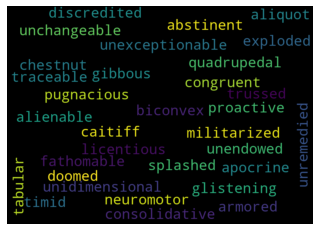

In [485]:
graph_wordcloud(generate_wordcloud_color_no_ranks(None, pd.Series(all_api_adjectives).value_counts()))

<Figure size 432x288 with 0 Axes>

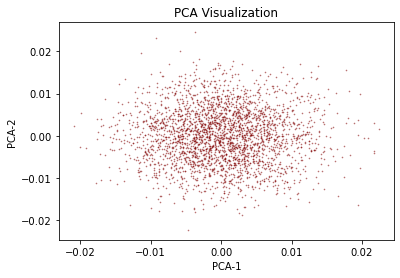

In [486]:
emb_df_PCA = w2v_embeddings_PCA([[adj] for adj in all_api_adjectives])

w2v_embeddings_PCA_plot(emb_df_PCA)

## Hand-picked

In [487]:
hand_picked_adjectives = [
    "passionate",
    "sinister",
    "stern",
    "malevolent",
    "absent-minded",
    "perfect",
    "charismatic",
    "obnoxious",
    "tetchy",
    "naughty",
    "innovative",
    "athletic",
    "ill-mannered",
    "bright",
    "haughty",
    "courteous",
    "exceptional",
    "cordial",
    "friendly",
    "ravishing",
    "scheming",
    "rude",
    "bloodthirsty",
    "timid",
    "irreplaceable",
    "grumpy",
    "taciturn",
    "understanding",
    "dignified",
    "grouchy",
    "muscular",
    "unstable",
    "dreadful",
    "disgusting",
    "crestfallen",
    "caring",
    "handsome",
    "humble",
    "flawless",
    "careless",
    "reticent",
    "ardent",
    "beautiful",
    "abominable",
    "enthusiastic",
    "bad",
    "nasty",
    "grisly",
    "gallant",
    "thoughtful",
    "fussy",
    "pretty",
    "volatile",
    "chivalrous",
    "sweet",
    "venal",
    "confrontational",
    "over-critical",
    "hostile",
    "witty",
    "sterling",
    "chic",
    "despicable",
    "dapper",
    "creative",
    "naive",
    "pompous",
    "wise",
    "gorgeous",
    "clumsy",
    "aggressive",
    "gentle",
    "amicable",
    "dreary",
    "outgoing",
    "outspoken",
    "wicked",
    "vicious",
    "warm-hearted",
    "morose",
    "rotund",
    "fastidious",
    "adventurous",
    "demure",
    "diligent",
    "fervent",
    "disagreeable",
    "violent",
    "corrupt",
    "scrupulous",
    "avaricious",
    "nosy",
    "precious",
    "monstrous",
    "generous",
    "petulant",
    "hard-working",
    "easy-going",
    "lanky",
    "grotesque",
    "inconsiderate",
    "compassionate",
    "ominous",
    "polite",
    "flamboyant",
    "gregarious",
    "arrogant",
    "shrewd",
    "impressive",
    "ungrateful",
    "drowsy",
    "independent",
    "terrifying",
    "nefarious",
    "level-headed",
    "insolent",
    "zealous",
    "kind-hearted",
    "cantankerous",
    "shy",
    "tight-lipped",
    "kind",
    "diabolic",
    "manipulative",
    "hot-headed",
    "vulgar",
    "possessive",
    "classy",
    "irascible",
    "vile",
    "secretive",
    "trustworthy",
    "ambitious",
    "meddlesome",
    "adaptable",
    "reserved",
    "chatty",
    "bossy",
    "reclusive",
    "jovial",
    "responsible",
    "funny",
    "mature",
    "dashing",
    "restless",
    "demonic",
    "affable",
    "unruly",
    "crooked",
    "professional",
    "short-tempered",
    "proficient",
    "boisterous",
    "pleasant",
    "cute",
    "menacing",
    "arresting",
    "stylish"
]

In [488]:
varied_set_adjectives = [
    "kind-hearted",
    "morose",
    "rotund",
    "cantankerous",
    "crestfallen",
    "fastidious",
    "humble",
    "warm-hearted",
    "demure",
    "diligent",
    "stern",
    "fervent",
    "ardent",
    "hot-headed",
    "nosy",
    "absent-minded",
    "enthusiastic",
    "charismatic",
    "irascible",
    "obnoxious",
    "generous",
    "petulant",
    "naughty",
    "tetchy",
    "easy-going",
    "fussy",
    "lanky",
    "meddlesome",
    "haughty",
    "venal",
    "flamboyant",
    "shrewd",
    "timid",
    "reclusive",
    "jovial",
    "chic",
    "drowsy",
    "mature",
    "funny",
    "independent",
    "restless",
    "naive",
    "level-headed",
    "grouchy",
    "proficient",
    "clumsy",
    "unstable",
    "boisterous",
    "zealous",
    "outspoken"
]

In [489]:
more_similar_vocabulary = [
    "passionate",
    "sinister",
    "malevolent",
    "perfect",
    "obnoxious",
    "innovative",
    "athletic",
    "ill-mannered",
    "bright",
    "courteous",
    "exceptional",
    "cordial",
    "friendly",
    "ravishing",
    "scheming",
    "rude",
    "bloodthirsty",
    "irreplaceable",
    "grumpy",
    "taciturn",
    "understanding",
    "dignified",
    "muscular",
    "dreadful",
    "disgusting",
    "caring",
    "handsome",
    "flawless",
    "careless",
    "reticent",
    "beautiful",
    "abominable",
    "bad",
    "nasty",
    "grisly",
    "gallant",
    "thoughtful",
    "pretty",
    "volatile",
    "chivalrous",
    "sweet",
    "confrontational",
    "over-critical",
    "hostile",
    "witty",
    "sterling",
    "good",
    "despicable",
    "dapper",
    "creative",
    "pompous",
    "wise",
    "gorgeous",
    "aggressive",
    "gentle",
    "amicable",
    "dreary",
    "outgoing",
    "wicked",
    "vicious",
    "warm-hearted",
    "adventurous",
    "demure",
    "diligent",
    "disagreeable",
    "violent",
    "corrupt",
    "scrupulous",
    "avaricious",
    "precious",
    "monstrous",
    "generous",
    "hard-working",
    "grotesque",
    "inconsiderate",
    "compassionate",
    "ominous",
    "polite",
    "gregarious",
    "arrogant",
    "impressive",
    "ungrateful",
    "independent",
    "terrifying",
    "nefarious",
    "insolent",
    "shy",
    "tight-lipped",
    "kind",
    "diabolic",
    "manipulative",
    "vulgar",
    "possessive",
    "classy",
    "vile",
    "secretive",
    "trustworthy",
    "ambitious",
    "adaptable",
    "reserved",
    "chatty",
    "bossy",
    "jovial",
    "responsible",
    "funny",
    "dashing",
    "demonic",
    "affable",
    "unruly",
    "crooked",
    "professional",
    "short-tempered",
    "pleasant",
    "cute",
    "menacing",
    "arresting",
    "stylish"
]

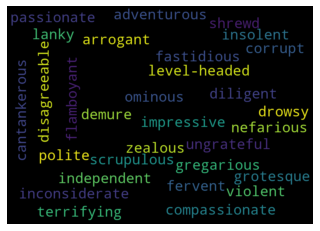

In [490]:
graph_wordcloud(generate_wordcloud_color_no_ranks(None, pd.Series(hand_picked_adjectives).value_counts()))

<Figure size 432x288 with 0 Axes>

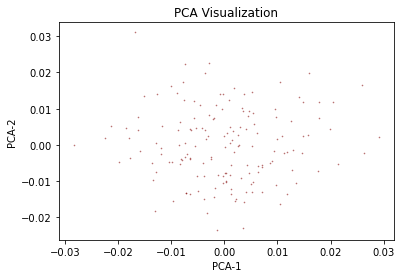

In [491]:
emb_df_PCA = w2v_embeddings_PCA([[adj] for adj in hand_picked_adjectives])

w2v_embeddings_PCA_plot(emb_df_PCA)

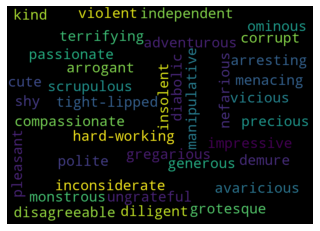

In [492]:
graph_wordcloud(generate_wordcloud_color_no_ranks(None, pd.Series(more_similar_vocabulary).value_counts()))

<Figure size 432x288 with 0 Axes>

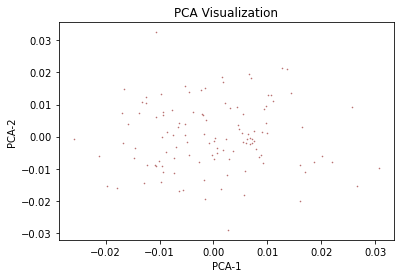

In [493]:
emb_df_PCA = w2v_embeddings_PCA([[adj] for adj in more_similar_vocabulary])

w2v_embeddings_PCA_plot(emb_df_PCA)

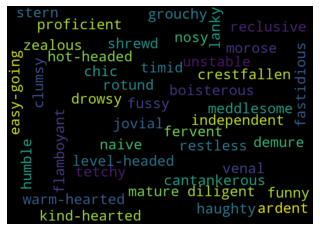

In [494]:
graph_wordcloud(generate_wordcloud_color_no_ranks(None, pd.Series(varied_set_adjectives).value_counts()))

<Figure size 432x288 with 0 Axes>

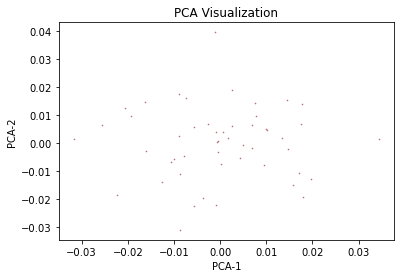

In [495]:
emb_df_PCA = w2v_embeddings_PCA([[adj] for adj in varied_set_adjectives])

w2v_embeddings_PCA_plot(emb_df_PCA)

In [496]:
def get_definition(entry):
    api_url  = "https://api.dictionaryapi.dev/api/v2/entries/en/"
    response = requests.get(api_url + entry)
    if response.status_code == requests.codes.ok:
        definitions = list(map(lambda x : x["meanings"], filter(lambda x : x["word"] == entry, json.loads(response.text))))
        adj_defs    = list(map(lambda x : x["definition"], list(map(lambda x : x, map(lambda x : x["definitions"],filter(lambda x : x["partOfSpeech"] == "adjective", [x for l in definitions for x in l]))))[0]))
        return adj_defs
    else:
        print("Error:", response.status_code, response.text)
        return None
    

In [497]:
varied_set_adjectives_definitions = {
    "absent-minded" : "forgetful, lost in thoughts or oblivious of one's surroundings",
    "ardent"        : "passionate and highly enthusiastic",
    "boisterous"    : "noisy, full of energy, and cheerful",
    "cantankerous"  : "bad-tempered, argumentative, and difficult to deal with",
    "charismatic"   : "a compelling charm that mesmerizes others",
    "chic"          : "fashionable or stylish, debonair",
    "clumsy"        : "awkward, lacking dexterity, especially in handling things; unwieldy",
    "crestfallen"   : "disappointed and dejected",
    "demure"        : "characterized by modesty, reserved",
    "diligent"      : "showing care and willingness to do one's work or duty well",
    "drowsy"        : "feeling extremely sleepy and lethargic; half-asleep",
    "easy-going"    : "calm and relaxed, not easily upset",
    "enthusiastic"  : "showing or having intense enjoyment and interest and an eagerness to partake in it",
    "fastidious"    : "meticulous, very particular about detail and accuracy, concerned about keeping things clean and tidy",
    "fervent"       : "showing or having strong feelings, marked by a great intensity",
    "flamboyant"    : "elaborate and extravagant, exudes confidence and style that attract attention",
    "funny"         : "providing fun, humorous, causing laughter; strange or unusual; difficult to understand",
    "fussy"         : "finicky or fastidious,  not easily pleased, worrying about unnecessary details",
    "generous"      : "willingness to help or give more than it is expected or usual, especially in monetary terms",
    "grouchy"       : "grumpy; easily annoyed and complaining about every little things",
    "haughty"       : "arrogant and disdainfully proud, having or showing a feeling of superiority and contempt for anything perceived as inferior",
    "hot-headed"    : "impetuous and fiery-tempered, gets angry easily",
    "humble"        : "modest, considerate of others, one who doesn't believe that other people are inferior; low-ranking in hierarchy or scale",
    "independent"   : "free from the control or influence of others; self-sufficient",
    "irascible"     : "gets angry easily, short-tempered, irritable",
    "jovial"        : "cheerful and friendly",
    "kind-hearted"  : "possessing or showing sympathy or kindness",
    "level-headed"  : "sensible and rational, exercising sound judgment",
    "lanky"         : "thin, tall, and ungainly",
    "morose"        : "sullen and ill-humoured, marked by a sense of gloom",
    "mature"        : "grown-up,  having reached the stage of physical or mental development of an adult",
    "meddlesome"    : "interfering or one who likes to meddle",
    "naive"         : "innocent or marked by unaffected simplicity; one who lacks experience or wisdom",
    "naughty"       : "disobedient or mischievous; indecent",
    "nosy"          : "curious about the affairs of other people, prying",
    "obnoxious"     : "unpleasant, rude, or highly offensive",
    "outspoken"     : "direct and frank in expressing one's opinion",
    "petulant"      : "being peevish or sulky in an unreasonable, childlike way",
    "proficient"    : "skilled and experienced, competent in doing or using something",
    "reclusive"     : "solitary, one who deliberately avoids the company of other other people or lives in seclusion",
    "restless"      : "unable to relax, keep still, or concentrate due to anxiety, impatience, or boredom",
    "rotund"        : "plump, large, and round in shape",
    "shrewd"        : "astute or sharp at understanding and making judgments",
    "stern"         : "serious and unyielding in nature or manner",
    "tetchy"        : "bad-tempered and easily annoyed",
    "timid"         : "lack of courage and self-assurance, easily frightened",
    "unstable"      : "unsteady, not firmly fixed; susceptible to psychiatric problems",
    "venal"         : "prone to taking bribes, corrupt",
    "warm-hearted"  : "having or showing kindness and sympathy",
    "zealous"       : "enthusiastic, characterized by zeal"
}

In [498]:
want_definitions = False

In [499]:
if want_definitions:
    more_similar_vocabulary_definitions = dict()
    for vocab in more_similar_vocabulary:
        print(vocab)
        definition = get_definition(vocab)
        if definition is not None:
            more_similar_vocabulary_definitions[vocab] = definition
    
    more_similar_vocabulary_definitions

In [500]:
get_definition("good")

['(of people)',
 '(of capabilities)',
 '(properties and qualities)',
 '(when with and) Very, extremely. See good and.',
 'Holy (especially when capitalized) .',
 '(of quantities)']

In [501]:
get_definition("critical")

['Inclined to find fault or criticize',
 'Pertaining to, or indicating, a crisis or turning point.',
 'Extremely important.',
 'Relating to criticism or careful analysis, such as literary or film criticism.',
 'Of a patient condition involving unstable vital signs and a prognosis that predicts the condition could worsen; or, a patient condition that requires urgent treatment in an intensive care or critical care medical facility.',
 'Likely to go out of control if disturbed, that is, opposite of stable.',
 'Of the point (in temperature, reagent concentration etc.) where a nuclear or chemical reaction becomes self-sustaining.',
 '(physics) Of a temperature that is equal to the temperature of the critical point of a substance, i.e. the temperature above which the substance cannot be liquefied.']

In [502]:
more_similar_vocabulary_definitions["over-critical"] = ['Inclined to find fault or criticize in excess.']

In [503]:
write_json(varied_set_adjectives_definitions, "14_varied_set_adjectives_definitions.json")
write_json(more_similar_vocabulary_definitions, "14_more_similar_vocabulary_definitions.json")

In [504]:
write_json(hand_picked_adjectives,  "14_hand_picked_adjectives.json")
write_json(more_similar_vocabulary, "14_more_similar_vocabulary.json")
write_json(varied_set_adjectives,   "14_varied_set_adjectives.json")